In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

In [3]:
train = pd.read_csv('airbnb_nyc_train.csv')
test = pd.read_csv('airbnb_nyc_test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37696 entries, 0 to 37695
Data columns (total 10 columns):
neighbourhood_group               37696 non-null object
neighbourhood                     37696 non-null object
room_type                         37696 non-null object
minimum_nights                    37696 non-null int64
number_of_reviews                 37696 non-null int64
reviews_per_month                 30117 non-null float64
calculated_host_listings_count    37696 non-null int64
availability_365                  37696 non-null int64
has_review                        37696 non-null int64
price                             37696 non-null int64
dtypes: float64(1), int64(6), object(3)
memory usage: 2.9+ MB


In [5]:
train = train.drop(['reviews_per_month'], axis=1)
test = test.drop(['reviews_per_month'], axis=1)

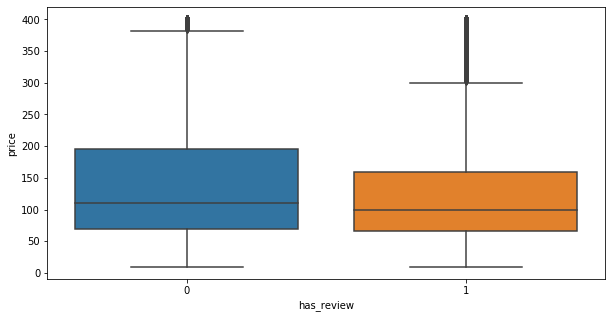

In [22]:
plt.figure(figsize=(10, 5))
g = sns.boxplot(x='has_review', y='price', data=train)

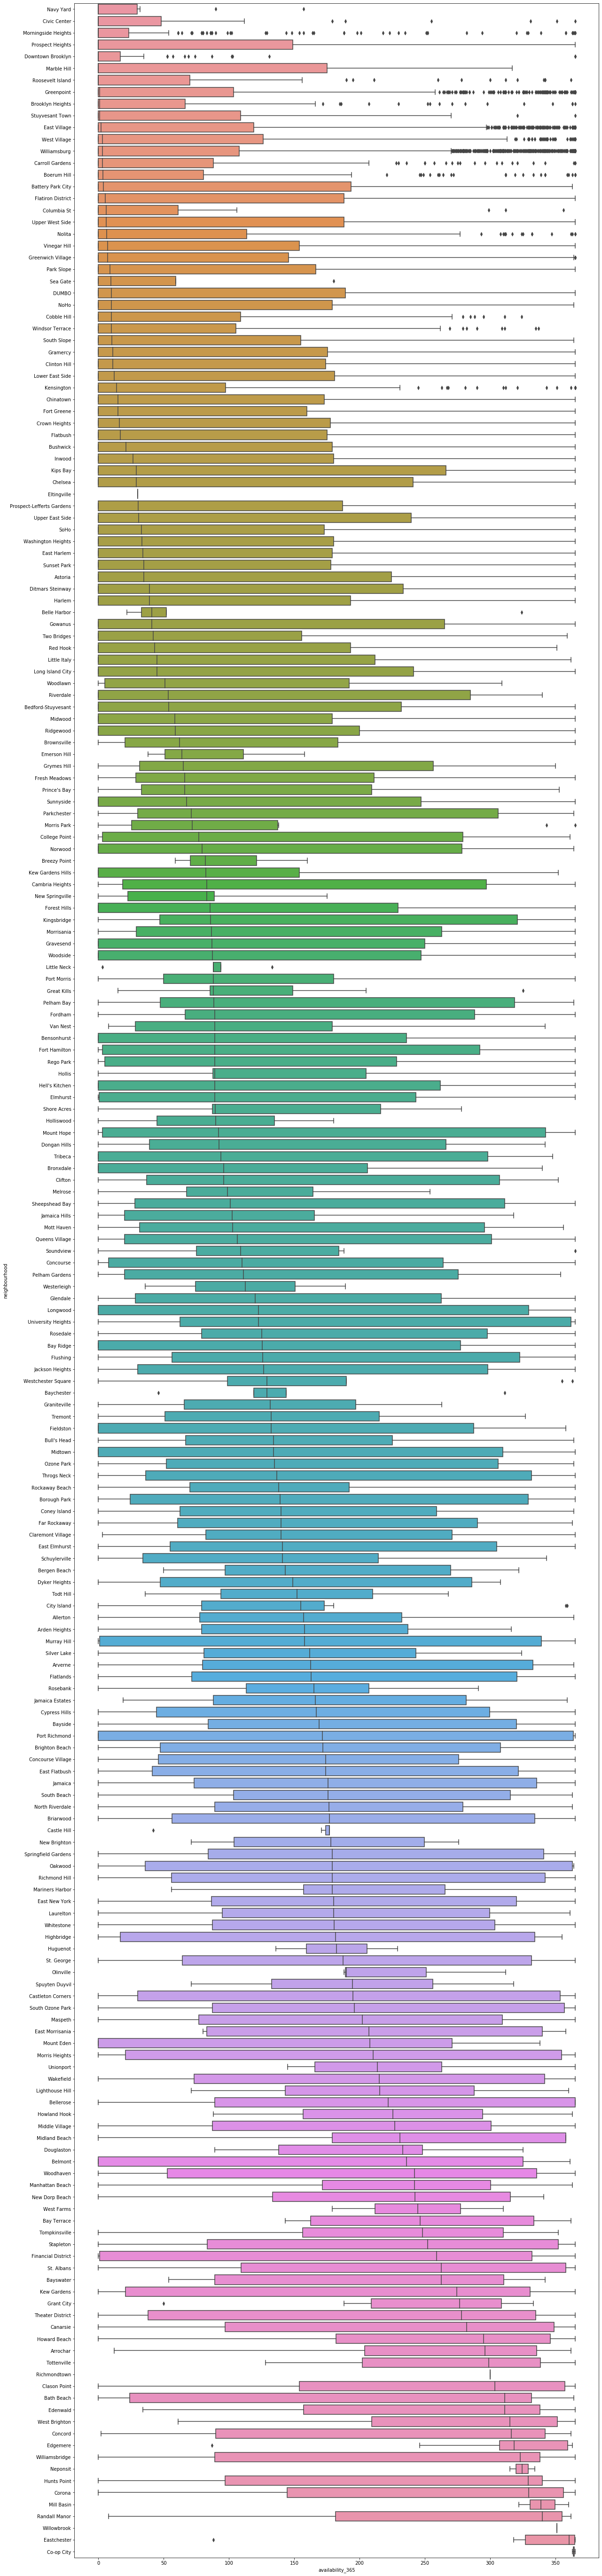

In [6]:
plt.figure(figsize=(20, 100))
my_order = train.groupby(by=["neighbourhood"])["availability_365"].median().sort_values(ascending = True).index
# sns.boxplot(y=data['neighbourhood'], x=data['price'], order=my_order)
g = sns.boxplot(x='availability_365', y='neighbourhood', data=train, order=my_order)

In [7]:
def map_availability(x):
    if x.availability_365 <= 50:
        return 0
    elif x.availability_365 <= 100:
        return 1
    elif x.availability_365 <= 150:
        return 2
    elif x.availability_365 <= 200:
        return 3
    elif x.availability_365 <= 250:
        return 4
    elif x.availability_365 <= 300:
        return 5
    else:
        return 6
train['maped_availability'] = train.apply(map_availability, axis=1)

In [8]:
def map_neighbourhood(x):
    if x.price <= 50:
        return 0
    elif x.price <= 100:
        return 1
    elif x.price <= 150:
        return 2
    elif x.price <= 200:
        return 3
    elif x.price <= 250:
        return 4
    elif x.price <= 300:
        return 5
    else:
        return 6
train['maped_loc'] = train.apply(map_neighbourhood, axis=1)

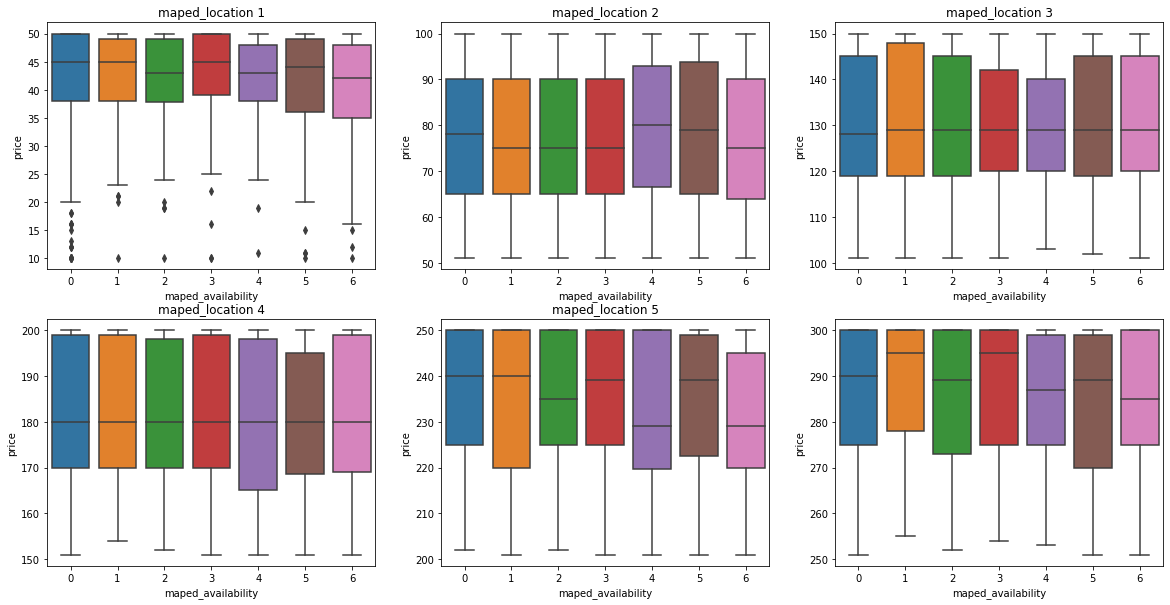

In [15]:
plt.figure(figsize=(20, 10))
for i in range(0,6):
    plt.title('maped_location '+str(i))
    plt.subplot(2, 3, i+1)
    temp = train[train.maped_loc == i]
    g = sns.boxplot(x='maped_availability', y='price', data=temp)

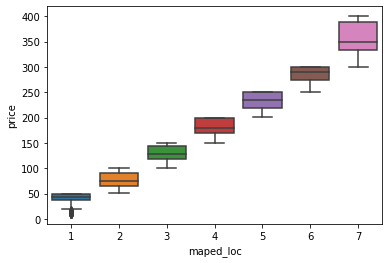

In [64]:
g = sns.boxplot(x='maped_loc', y='price', data=train)

In [143]:
test['maped_loc'] = test.apply(map_neighbourhood, axis=1)

In [117]:
test['maped_availability'] = test.apply(map_availability, axis=1)

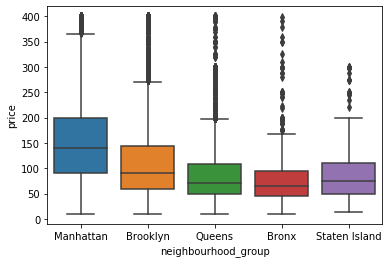

In [66]:
g = sns.boxplot(x='neighbourhood_group', y='price', data=train)

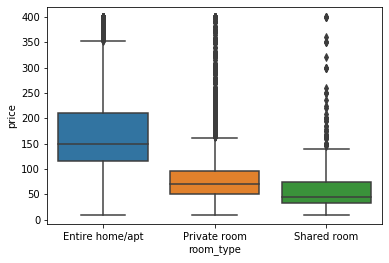

In [67]:
g = sns.boxplot(x='room_type', y='price', data=train)

In [144]:
train['maped_room_type'] = train['room_type'].map({'Entire home/apt':0, 'Private room':1, 'Shared room':1})
test['maped_room_type'] = test['room_type'].map({'Entire home/apt':0, 'Private room':1, 'Shared room':1})


In [145]:
train['minimum_nights'].describe()

count    37696.000000
mean         7.025891
std         20.347440
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22'),
 Text(0, 0, '23'),
 Text(0, 0, '24'),
 Text(0, 0, '25'),
 Text(0, 0, '26'),
 Text(0, 0, '27'),
 Text(0, 0, '28'),
 Text(0, 0, '29'),
 Text(0, 0, '30'),
 Text(0, 0, '31'),
 Text(0, 0, '32'),
 Text(0, 0, '33'),
 Text(0, 0, '35'),
 Text(0, 0, '37'),
 Text(0, 0, '39'),
 Text(0, 0, '40'),
 Text(0, 0, '42'),
 Text(0, 0, '43'),
 Text(0, 0, '44'),
 Text(0, 0, '45'),
 Text(0, 0, '47'),
 Text(0, 0, '50'),
 Text(0, 0, '53'),
 Text(0, 0, '55'),
 Text(0, 0, '56'),
 Text(0, 0, '58'),
 Text(0, 0, '59'),
 Text(0, 0, '60'),
 Text(0, 0, '62'),
 Text(0, 0, '65'),
 Text(0, 0, '68'),
 Text(0, 0, '70'),
 T

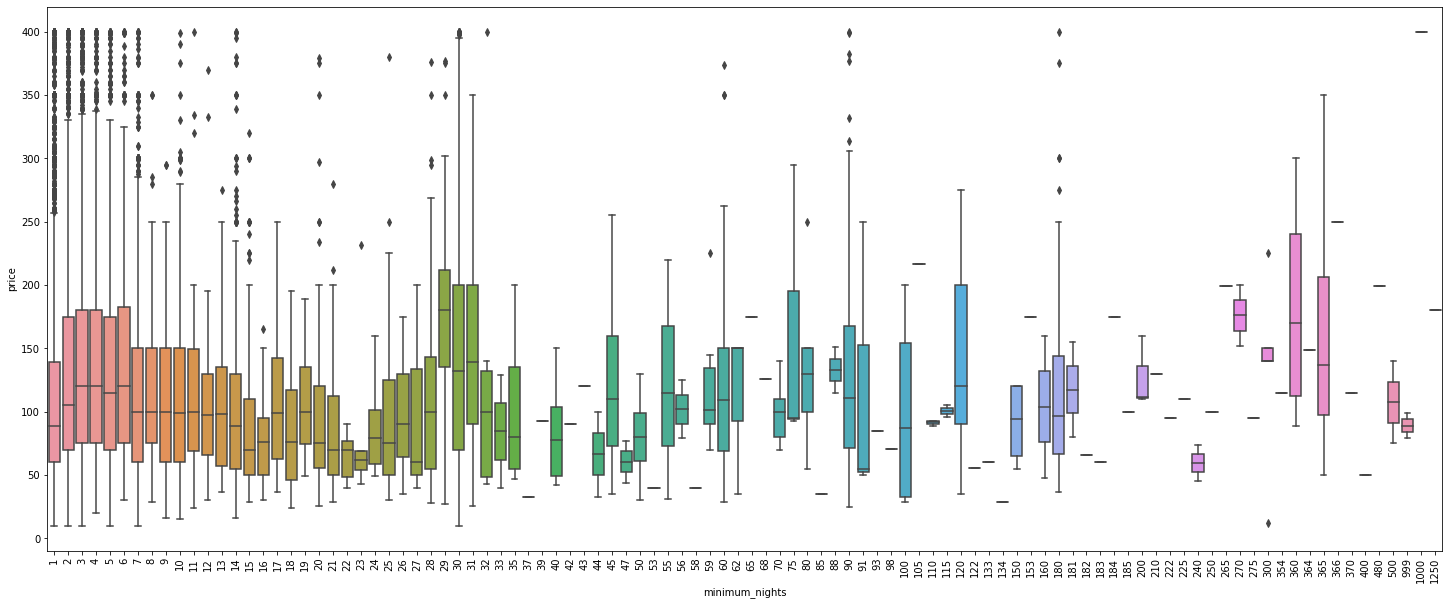

In [23]:
plt.figure(figsize=(25, 10))
# my_order = train.groupby(by=["minimum_nights"])["price"].median().sort_values(ascending = False).index
g = sns.boxplot(x=train['minimum_nights'], y=train['price'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

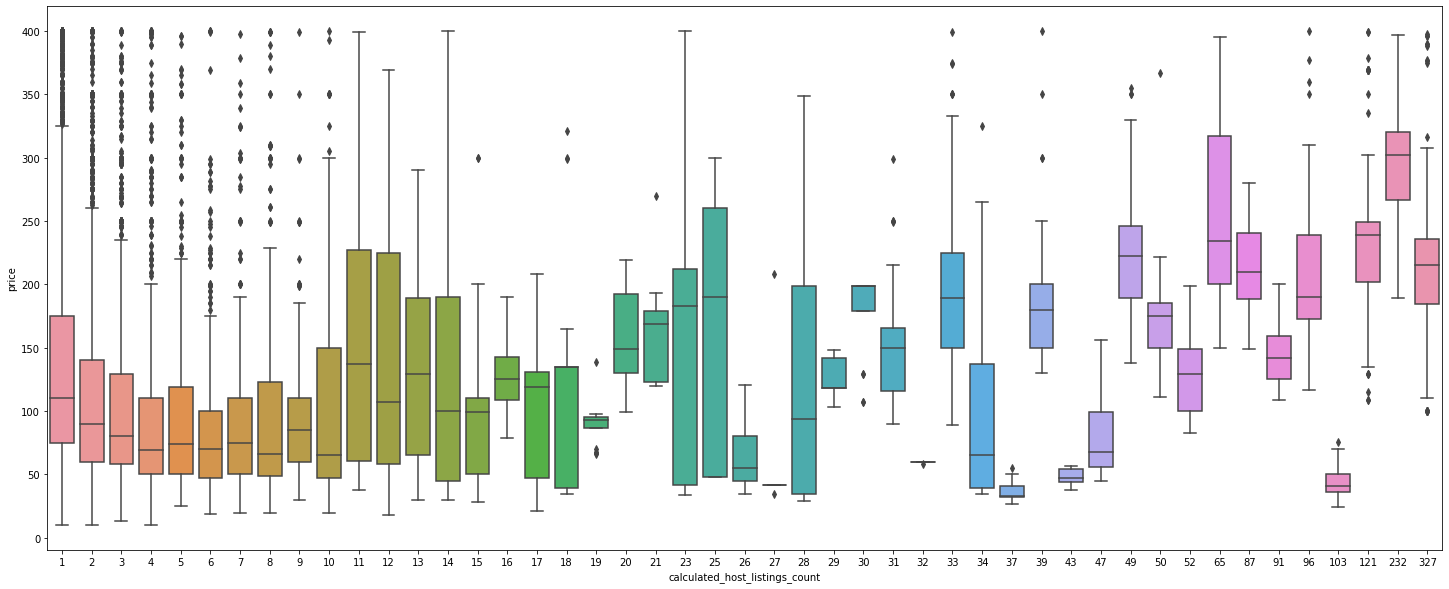

In [71]:
plt.figure(figsize=(25, 10))
g = sns.boxplot(x='calculated_host_listings_count', y='price', data=train)


In [146]:
X_train = train.iloc[:,-2:]
y_train = train['price']
X_test = test.iloc[:,-2:]
y_test = test['price']

In [72]:
X_train = train.iloc[:,-8:]
y_train = train['price']
X_test = test.iloc[:,-8:]
y_test = test['price']

In [73]:
X_train = X_train.drop(['price'], axis=1)
X_test = X_test.drop(['price'], axis=1)

In [150]:
np.log(y_train)

0        4.744932
1        4.595120
2        5.298317
3        5.402677
4        5.556828
5        5.521461
6        4.653960
7        4.007333
8        4.007333
9        4.477337
10       4.174387
11       4.174387
12       5.393628
13       4.787492
14       4.248495
15       5.416100
16       4.488636
17       4.007333
18       4.382027
19       4.941642
20       4.553877
21       4.941642
22       3.891820
23       5.416100
24       5.010635
25       4.744932
26       4.127134
27       3.610918
28       4.499810
29       3.663562
           ...   
37666    4.553877
37667    4.828314
37668    4.700480
37669    4.025352
37670    4.510860
37671    4.382027
37672    4.976734
37673    5.164786
37674    5.187386
37675    4.653960
37676    4.094345
37677    5.105945
37678    3.465736
37679    5.857933
37680    4.828314
37681    5.521461
37682    5.298317
37683    3.951244
37684    5.342334
37685    4.174387
37686    4.700480
37687    3.931826
37688    5.003946
37689    5.913503
37690    4

In [151]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression().fit(X_train, y_train)

print(sqrt(mean_squared_error(np.log(y_train), np.log(linear_reg.predict(X_train)))))
print(sqrt(mean_squared_error(np.log(y_test), np.log(linear_reg.predict(X_test)))))

0.20398771439328708
0.20321925481667655


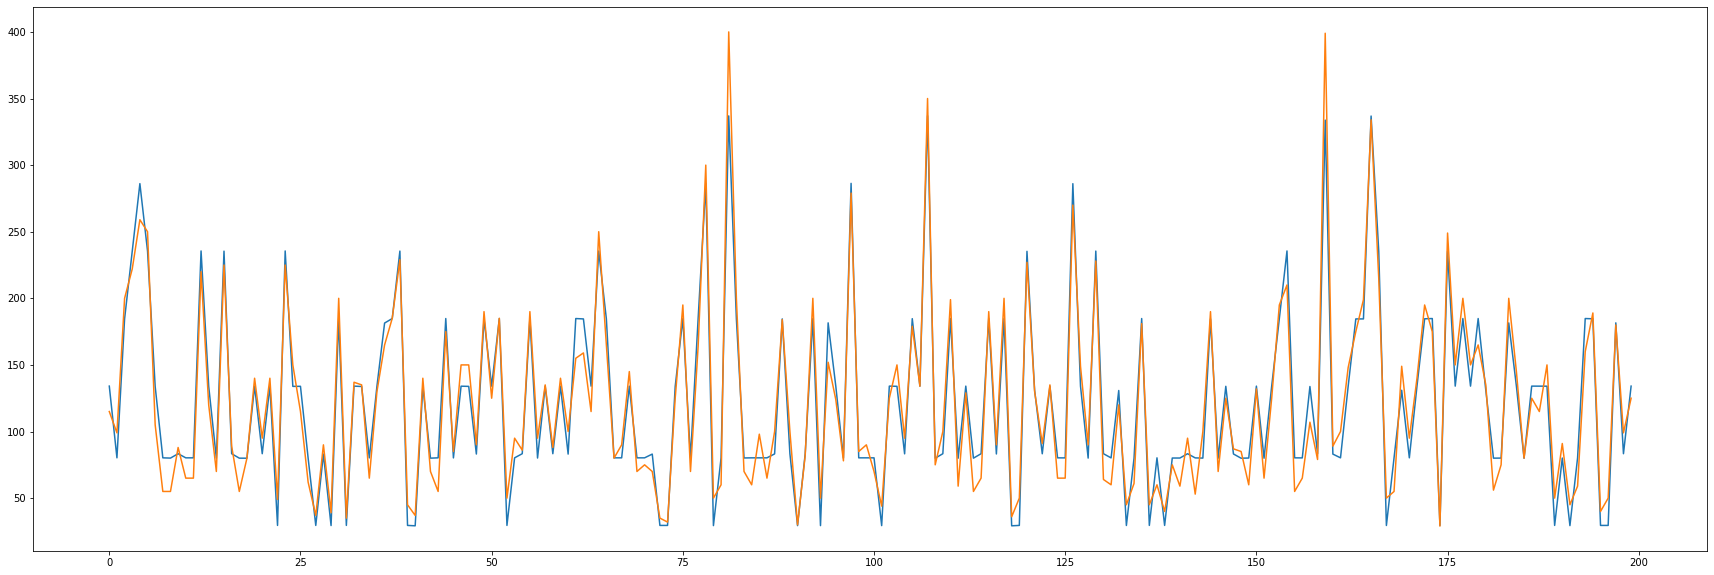

In [122]:
plt.figure(figsize=(30,10))
plt.plot(linear_reg.predict(X_train)[:200])
plt.plot(y_train[:200])

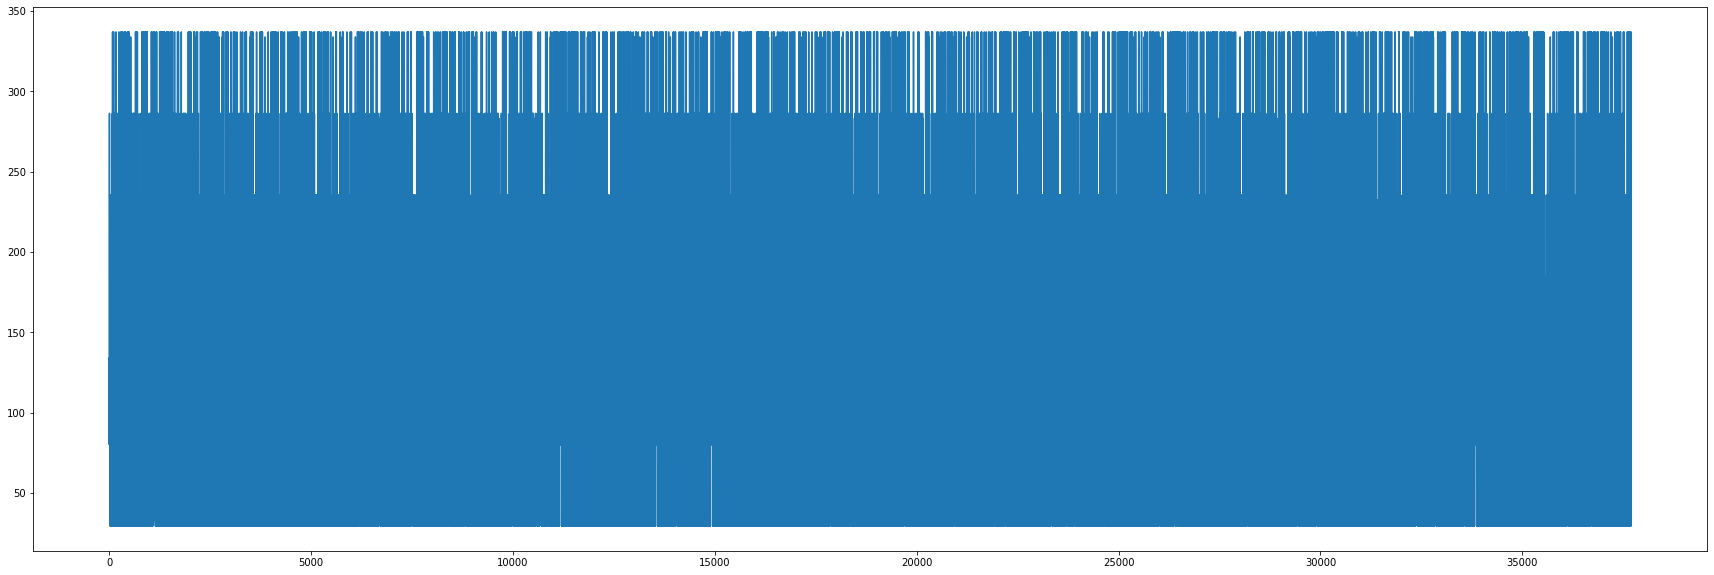

In [31]:
plt.figure(figsize=(30,10))
plt.plot(linear_reg.predict(X_train))

In [137]:
from sklearn import linear_model
ridge_reg = linear_model.Ridge(alpha=0.5).fit(X_train, y_train)

print(sqrt(mean_squared_error(y_train, ridge_reg.predict(X_train))))
print(sqrt(mean_squared_error(y_test, ridge_reg.predict(X_test))))
ridge_reg.score(X_train, y_train), ridge_reg.score(X_test, y_test)

16.29379015872486
124.92656658978603


(0.9565135561653361, -1.549263945555035)

In [87]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=0.001).fit(X_train, y_train)

print(sqrt(mean_squared_error(y_train, lasso_reg.predict(X_train))))
print(sqrt(mean_squared_error(y_test, lasso_reg.predict(X_test))))
lasso_reg.score(X_train, y_train), lasso_reg.score(X_test, y_test)

16.293790396692106
16.31833225226336


(0.956513554895116, 0.9565032570458766)

In [78]:
from sklearn import linear_model
bayesian_reg = linear_model.BayesianRidge().fit(X_train, y_train)
bayesian_reg.score(X_train, y_train), bayesian_reg.score(X_test, y_test)

(0.9565135562003105, 0.9565031570625491)

In [94]:
from sklearn import linear_model
sdg_clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-3).fit(X_train, y_train)
sdg_clf.score(X_train, y_train), sdg_clf.score(X_test, y_test)

(0.956430881059249, 0.9564756146885796)

In [88]:
from sklearn import svm
svm_clf = svm.SVR().fit(X_train, y_train)

print(sqrt(mean_squared_error(y_train, svm_clf.predict(X_train))))
print(sqrt(mean_squared_error(y_test, svm_clf.predict(X_test))))
svm_clf.score(X_train, y_train), svm_clf.score(X_test, y_test)

C:\Application\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


14.886431841846404
14.863394700908342


(0.963701315762801, 0.963913794601016)

In [79]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=600).fit(X_train, y_train)

print(sqrt(mean_squared_error(y_train, neigh.predict(X_train))))
print(sqrt(mean_squared_error(y_test, neigh.predict(X_test))))
neigh.score(X_train, y_train), neigh.score(X_test, y_test)

64.77038769286406
64.82656595117548


(0.31283243929217575, 0.31354633503046736)

In [80]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor().fit(X_train, y_train)

print(sqrt(mean_squared_error(y_train, mlp.predict(X_train))))
print(sqrt(mean_squared_error(y_test, mlp.predict(X_test))))
mlp.score(X_train, y_train), mlp.score(X_test, y_test)

14.811128655624985
14.833725943806746


(0.9640676215536591, 0.9640577138524977)

In [81]:
from sklearn.ensemble import VotingRegressor
svm_clf = svm.SVR()
neigh = KNeighborsRegressor(n_neighbors=600)
mlp = MLPRegressor()
ereg = VotingRegressor(estimators=[('svm', svm_clf), ('neigh', neigh), ('mlp', mlp)]).fit(X_train, y_train)

print(sqrt(mean_squared_error(y_train, ereg.predict(X_train))))
print(sqrt(mean_squared_error(y_test, ereg.predict(X_test))))
ereg.score(X_train, y_train), ereg.score(X_test, y_test)


NameError: name 'svm' is not defined